In [7]:
using PyPlot, PyCall
using Distributions

# モンテカルロ積分

期待値の積分計算ができない場合は、確率分布$p(\mathbf x)$からサンプル$\mathbf x^{(n)}$を取得し、近似計算を行う


\begin{align}
 \left \langle f(\mathbf x)  \right\rangle _{p(\mathbf x) } &= \int f(\mathbf x)  p(\mathbf x)  \mathrm d \mathbf x \\
 &\approx  \frac {1}{N} \sum_{n=1}^{N} f(\mathbf x^{(n)})
\end{align}


## モンテカルロ積分例

尤度関数にガウス分布を設定し、その平均$\mu$について事前分布として共役ではないガンマ分布(共役分布はガウス分布)を仮定した場合　\
積分計算を解析的に行うことが困難であるため、モンテカルロ積分を利用

\begin{align}
 p(\mu \mid \mathbf X) &= \frac {p(\mathbf X \mid \mu)p(\mu)}{p(\mathbf X)} \\
 &= \frac {p(\mathbf X \mid \mu)p(\mu)}{\int p(\mathbf X \mid \mu)p(\mu)\mathrm d  \mu} \\
 &\approx \frac {p(\mathbf X \mid \mu)p(\mu)}{\frac {1}{N} \sum_{n=1}^{N} p(\mathbf X \mid \mathbf \mu^{(n)})} 
 \end{align}

In [11]:
function expt(a, b, σ, Y, X, Nₛ)
    S = rand(Gamma(a, 1.0/b), Nₛ) #ガンマ分布からのサンプリング
    C = mean([exp(sum(logpdf.(Normal(s, σ), Y))) for s in S])# 分母の計算 モンテカルロ積分を利用
    curve = [exp(sum(logpdf.(Normal(mu, σ), Y))) * pdf.(Gamma(a, 1.0/b), mu) for mu in X]# 分子の計算
    μ = mean([s * exp(sum((logpdf.(Normal(s, σ), Y))))/C for s in S])#サンプリングにより平均計算
    σ = mean([(s-μ)^2 * exp(sum((logpdf.(Normal(s, σ), Y))))/C for s in S])#サンプリングにより分散計算
    return curve/C, μ, σ
end

expt (generic function with 1 method)

In [12]:
X = range(-5, 10, length=1000)

-5.0:0.015015015015015015:10.0

# Gamma distribution

\begin{align}
f(x) &= \frac{1}{\Gamma(k)\theta^k}x^{k-1}e^{-\frac{x}{\theta}} \\
\end{align}


$k$: shape parameter

$\theta$: sacale parameter



$\theta = \frac{\sigma}{\mu}$ \
$k = \frac{\mu^2}{\sigma}$


参照 [ガンマ分布のパラメータ指定方法まとめ](ガンマ分布のパラメータ指定方法まとめ)

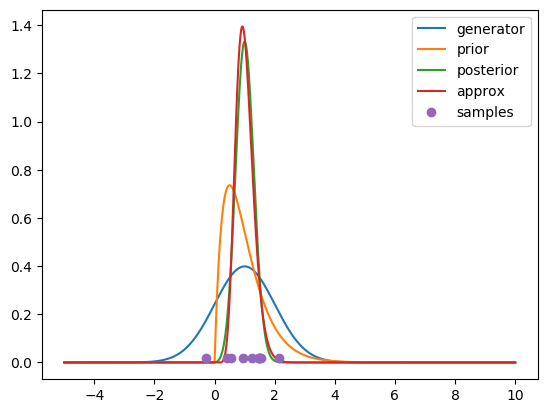

In [13]:
a = 2.0
b = 2.0
μ = 1.0
σ = 1.0

N = 10
Y = rand(Normal(μ, σ), N)

Nₛ = 100000
posterior, μₚ , σₚ = expt(a, b, σ, Y, X, Nₛ)

θ = σₚ / μₚ 
k = μₚ^2 / σₚ

figure()
plot(X, pdf.(Normal(μ, σ), X))
plot(X, pdf.(Gamma(a, 1/b), X))
plot(X, posterior)
plot(X, pdf.(Gamma(k, θ), X))
plot(Y, 0.02*ones(N), "o")
legend(["generator", "prior", "posterior", "approx", "samples"])
show()